이산형 확률분포

In [3]:
#1차원 이산분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X = [x_set,f]

In [4]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'probability')

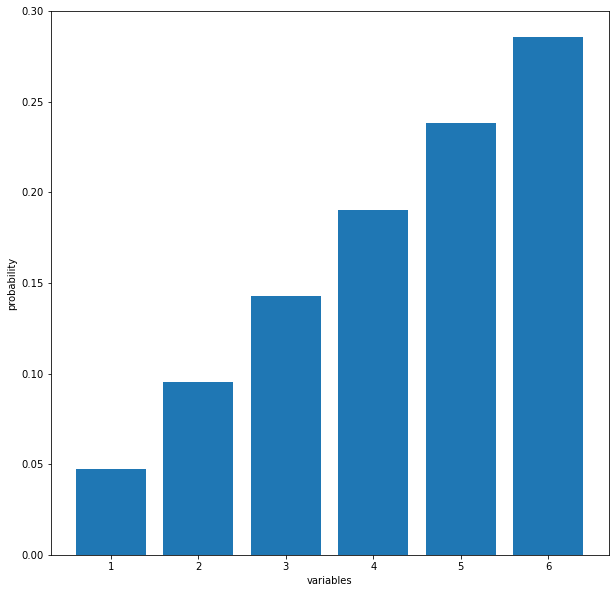

In [9]:
plt.figure(figsize = (10,10))
plt.bar(x_set,prob)
plt.xlabel('variables')
plt.ylabel('probability')

In [10]:
np.all(prob>0)

True

In [11]:
np.sum(prob)

0.9999999999999999

In [16]:
# 누적 분포 함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [17]:
F(3)

0.2857142857142857

In [22]:
# 확률 변수의 변환 : 확률변수 X 에 2를 곱하고 3은 더한 2X+3
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob= np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [24]:
#1차원 이산형 확률변수 지표
#평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지효가 되며 기대값이라고도 부른다
np.sum([x_k *f(x_k) for x_k in x_set])


4.333333333333333

In [25]:
# 확률변수의 기댓값은 확률 변수를 무제한 시행하여 얻은 실현값의 평균
sample= np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.331832

In [26]:
# 일반화
def E(X,g=lambda x: x):
    x_set ,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [27]:
E(X)

4.333333333333333

In [28]:
E(X,g=lambda x:2*x+3)

11.666666666666664

In [29]:
# 기댓값의 선형성
2 * E(X) +3

11.666666666666666

In [32]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [41]:
# 일반화
def V(X,g = lambda x:x):
    x_set ,f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [39]:
V(X)

2.2222222222222223

In [43]:
V(X,g=lambda x:2*x)

8.88888888888889

In [44]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [45]:
#결합확률함수
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0

In [46]:
XY = [x_set,y_set,f_XY]

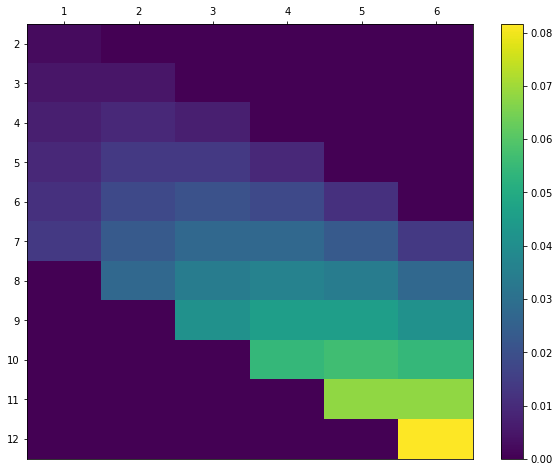

In [53]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor = False)
ax.set_yticklabels(np.arange(2,13),minor = False)
# y축을 내림차순의 숫자가 되게하여 위아래를 역전시킴
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)